In [1]:
from typing import Generator, Iterator, Tuple
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import xml.etree.ElementTree as ET

DATA_DIR = Path("data")


In [2]:
# Cargar y analizar el archivo XML
tree = ET.parse('data/annotations/annotations_00.xml')
root = tree.getroot()

# Obtener todas las anotaciones
annotations = root.findall('image')
annotations[0].attrib

{'id': '0',
 'name': 'Captura de pantalla 2024-06-10 a las 19.24.333.png',
 'width': '550',
 'height': '862'}

In [3]:




# Crear un diccionario para almacenar las anotaciones por nombre de imagen
annotations_dict = {}

# Iterar sobre las anotaciones y extraer los datos
for image in annotations:
    image_name = image.get('name')
    skeletons = []
    for skeleton in image.findall('skeleton'):
        keypoints = []
        for point in skeleton.findall('points'):
            x = point.get('points').split(',')[0]
            y = point.get('points').split(',')[1]
            keypoints.append((x, y))
        skeletons.append(keypoints)
    annotations_dict[image_name] = skeletons

# Imprimir el diccionario de anotaciones para verificar
for image_name, skeletons in annotations_dict.items():
    print(f"Imagen: {image_name}")
    for i, skeleton in enumerate(skeletons):
        print(f"  Esqueleto: {skeleton}")
        


Imagen: Captura de pantalla 2024-06-10 a las 19.24.333.png
  Esqueleto: [('278.46', '262.19'), ('368.39', '290.25'), ('359.91', '195.75'), ('334.46', '275.48'), ('273.29', '450.46'), ('350.56', '457.83'), ('278.46', '576.70'), ('346.33', '575.22'), ('261.20', '734.68'), ('331.15', '714.79')]
Imagen: IMG_5572(1)_000.jpg
  Esqueleto: [('487.67', '468.76'), ('639.36', '542.01'), ('615.60', '335.39'), ('574.17', '495.08'), ('462.30', '875.66'), ('603.36', '892.89'), ('495.96', '1172.22'), ('618.04', '1160.76'), ('468.94', '1529.43'), ('605.63', '1455.00')]
Imagen: IMG_5572(1)_001.jpg
  Esqueleto: [('476.55', '468.17'), ('649.92', '535.00'), ('616.76', '340.76'), ('585.73', '490.66'), ('440.74', '882.29'), ('578.49', '896.20'), ('499.28', '1175.13'), ('625.09', '1159.94'), ('466.57', '1525.05'), ('605.63', '1454.16')]
Imagen: IMG_5572(1)_002.jpg
  Esqueleto: [('465.43', '467.58'), ('660.49', '527.99'), ('617.92', '345.35'), ('597.30', '486.23'), ('437.43', '885.61'), ('576.83', '897.86'), (

In [4]:
import os

# Ruta a la carpeta de imágenes
images_folder = 'data/dataset_train'

# Crear una lista de rutas completas a las imágenes
image_files = [os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Emparejar anotaciones con imágenes
for image_file in image_files:
    image_name = os.path.basename(image_file)
    if image_name in annotations_dict:
        skeletons = annotations_dict[image_name]
        print(f"Emparejando {image_name} con {len(skeletons)} esqueletos")

# Aquí puedes continuar con el procesamiento de las imágenes y anotaciones


Emparejando IMG_5616_011.jpg con 1 esqueletos
Emparejando IMG_5616_005.jpg con 1 esqueletos
Emparejando IMG_5617(1)_017.jpg con 1 esqueletos
Emparejando IMG_5617(1)_003.jpg con 1 esqueletos
Emparejando IMG_5617_000.jpg con 1 esqueletos
Emparejando IMG_5617_014.jpg con 1 esqueletos
Emparejando IMG_5617_028.jpg con 1 esqueletos
Emparejando IMG_5615_020 (1).jpg con 1 esqueletos
Emparejando IMG_5617_029.jpg con 1 esqueletos
Emparejando IMG_5617_015.jpg con 1 esqueletos
Emparejando IMG_5617_001.jpg con 1 esqueletos
Emparejando IMG_5617(1)_002.jpg con 1 esqueletos
Emparejando IMG_5617(1)_016.jpg con 1 esqueletos
Emparejando IMG_5616_004.jpg con 1 esqueletos
Emparejando IMG_5616_010.jpg con 1 esqueletos
Emparejando IMG_5615_029 (1).jpg con 1 esqueletos
Emparejando IMG_5616_006.jpg con 1 esqueletos
Emparejando IMG_5616_012.jpg con 1 esqueletos
Emparejando IMG_5617(1)_028.jpg con 1 esqueletos
Emparejando IMG_5617(1)_000.jpg con 1 esqueletos
Emparejando IMG_5617(1)_014.jpg con 1 esqueletos
Empar

In [5]:
annotations_dict

{'Captura de pantalla 2024-06-10 a las 19.24.333.png': [[('278.46', '262.19'),
   ('368.39', '290.25'),
   ('359.91', '195.75'),
   ('334.46', '275.48'),
   ('273.29', '450.46'),
   ('350.56', '457.83'),
   ('278.46', '576.70'),
   ('346.33', '575.22'),
   ('261.20', '734.68'),
   ('331.15', '714.79')]],
 'IMG_5572(1)_000.jpg': [[('487.67', '468.76'),
   ('639.36', '542.01'),
   ('615.60', '335.39'),
   ('574.17', '495.08'),
   ('462.30', '875.66'),
   ('603.36', '892.89'),
   ('495.96', '1172.22'),
   ('618.04', '1160.76'),
   ('468.94', '1529.43'),
   ('605.63', '1455.00')]],
 'IMG_5572(1)_001.jpg': [[('476.55', '468.17'),
   ('649.92', '535.00'),
   ('616.76', '340.76'),
   ('585.73', '490.66'),
   ('440.74', '882.29'),
   ('578.49', '896.20'),
   ('499.28', '1175.13'),
   ('625.09', '1159.94'),
   ('466.57', '1525.05'),
   ('605.63', '1454.16')]],
 'IMG_5572(1)_002.jpg': [[('465.43', '467.58'),
   ('660.49', '527.99'),
   ('617.92', '345.35'),
   ('597.30', '486.23'),
   ('437.43',

In [6]:
import xml.etree.ElementTree as ET

# Lista de archivos XML a concatenar
xml_files = [
    'data/annotations/annotations_01.xml', 
    'data/annotations/annotations_02.xml', 
    'data/annotations/annotations_03.xml', 
    'data/annotations/annotations_04.xml', 
    'data/annotations/annotations_00.xml'
]

# Crear un nuevo elemento raíz para el archivo combinado
combined_root = ET.Element('annotations')

# Función para agregar las anotaciones de un archivo XML al elemento raíz combinado
def add_annotations_from_file(xml_file, combined_root):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for image in root.findall('image'):
        combined_root.append(image)

# Iterar sobre los archivos XML y agregar sus anotaciones al elemento raíz combinado
for xml_file in xml_files:
    add_annotations_from_file(xml_file, combined_root)

# Guardar el archivo XML combinado
combined_tree = ET.ElementTree(combined_root)
combined_tree.write(DATA_DIR / 'annotations/combined_annotations.xml', encoding='utf-8', xml_declaration=True)

print("Las anotaciones se han combinado y guardado en 'combined_annotations.xml'")


Las anotaciones se han combinado y guardado en 'combined_annotations.xml'


In [7]:
#Lista de archivos en la carpeta annotations con extension xml
xml_files = [f for f in DATA_DIR.glob('annotations/*.xml')]

combined_root = ET.Element('annotations')

for file in xml_files:
    add_annotations_from_file(file, combined_root)

combined_tree = ET.ElementTree(combined_root)
with open("all_labels.xml", "wb") as f:
    f.write(ET.tostring(combined_root))

In [8]:
combined_tree

In [9]:
def parse_xml(file) -> np.ndarray:
    ...

def flow_from_directory(img_dir: str, labels_dir: str, size: Tuple[int]) -> Generator:

    with open("all_labels.xml") as f:
        labels = parse_xml(f)

    for img_path, labels_ in zip(img_dir, labels):
        yield Image.open(img_path), labels_

In [10]:
tree = ET.parse('data/annotations/annotations_01.xml')
root = tree.getroot()
labels = []
for child in root:
    if child.tag == 'object':
        label = {}
        for obj in child:
            if obj.tag == 'name':
                label['name'] = obj.text
            if obj.tag == 'bndbox':
                for bndbox in obj:
                    label[bndbox.tag] = int(bndbox.text)
        labels.append(label)

labels

[]

In [11]:
for child in root:
    if child.tag == 'image':
        print(child.attrib)
        

{'id': '0', 'name': 'IMG_5619(2)_002.jpg', 'width': '1080', 'height': '1920'}
{'id': '1', 'name': 'IMG_5619(2)_003.jpg', 'width': '1080', 'height': '1920'}
{'id': '2', 'name': 'IMG_5619(2)_004.jpg', 'width': '1080', 'height': '1920'}
{'id': '3', 'name': 'IMG_5619(2)_005.jpg', 'width': '1080', 'height': '1920'}
{'id': '4', 'name': 'IMG_5619(2)_006.jpg', 'width': '1080', 'height': '1920'}
{'id': '5', 'name': 'IMG_5619(2)_007.jpg', 'width': '1080', 'height': '1920'}
{'id': '6', 'name': 'IMG_5619(2)_008.jpg', 'width': '1080', 'height': '1920'}
{'id': '7', 'name': 'IMG_5619(2)_009.jpg', 'width': '1080', 'height': '1920'}
{'id': '8', 'name': 'IMG_5619(2)_010.jpg', 'width': '1080', 'height': '1920'}
{'id': '9', 'name': 'IMG_5619(2)_011.jpg', 'width': '1080', 'height': '1920'}
{'id': '10', 'name': 'IMG_5619(2)_012.jpg', 'width': '1080', 'height': '1920'}
{'id': '11', 'name': 'IMG_5619(2)_013.jpg', 'width': '1080', 'height': '1920'}
{'id': '12', 'name': 'IMG_5619(2)_014.jpg', 'width': '1080', '

In [12]:
x, y = 1, 2
lista = [x, y]

print(lista)

[1, 2]


In [13]:
from flow_from_directory import *
from pathlib import Path
import xml.etree.ElementTree as ET
import json

In [14]:


DATA_DIR = Path("data")

xml_files = [f for f in DATA_DIR.glob("annotations/*.xml")]
combined_root = ET.Element("annotations")

for file in xml_files:
    add_annotations_from_file(file, combined_root)

with open("all_labels.xml", "wb") as f:
    f.write(ET.tostring(combined_root))

In [15]:
annotations_dict = pair_annotations_with_images("all_labels.xml")

# annotations_dict = reshape_annotations(annotations_dict)

In [16]:
annotations_dict

{'IMG_5687(1)_000.jpg': {'image_path': 'data/dataset_train/IMG_5687(1)_000.jpg',
  'image_height': 1920,
  'image_width': 1080,
  'keypoints': [['467.96', '481.24'],
   ['635.41', '498.80'],
   ['577.92', '345.11'],
   ['568.52', '480.84'],
   ['448.55', '882.17'],
   ['592.51', '884.66'],
   ['443.09', '1163.82'],
   ['592.07', '1124.72'],
   ['404.66', '1449.09'],
   ['578.80', '1366.03']]},
 'IMG_5687(1)_001.jpg': {'image_path': 'data/dataset_train/IMG_5687(1)_001.jpg',
  'image_height': 1920,
  'image_width': 1080,
  'keypoints': [['470.03', '492.99'],
   ['634.02', '513.31'],
   ['582.76', '354.09'],
   ['569.90', '490.51'],
   ['430.59', '884.93'],
   ['577.31', '886.04'],
   ['442.40', '1176.95'],
   ['602.43', '1128.86'],
   ['404.66', '1449.23'],
   ['578.80', '1366.78']]},
 'IMG_5687(1)_002.jpg': {'image_path': 'data/dataset_train/IMG_5687(1)_002.jpg',
  'image_height': 1920,
  'image_width': 1080,
  'keypoints': [['472.10', '504.73'],
   ['632.64', '527.82'],
   ['587.60', '

In [17]:
with open('annotations.json', 'w') as f:
    json.dump(annotations_dict, f)

In [18]:
import json

# Load the ground-truth annotations.
with open("annotations.json") as infile:
    json_data = json.load(infile)

# Set up a dictionary, mapping all the ground-truth information
# with respect to the path of the image.


In [19]:
IMG_DIR = "data/dataset_train"

def get_annotation(name: str):
    data = json_data[name]
    img_data = plt.imread(data['image_path'])
    # If the image is RGBA convert it to RGB.
    if img_data.shape[-1] == 4:
        img_data = img_data.astype(np.uint8)
        img_data = Image.fromarray(img_data)
        img_data = np.array(img_data.convert("RGB"))
    data["img_data"] = img_data

    return data

In [20]:
get_annotation('IMG_5687(1)_001.jpg')

{'image_path': 'data/dataset_train/IMG_5687(1)_001.jpg',
 'image_height': 1920,
 'image_width': 1080,
 'keypoints': [['470.03', '492.99'],
  ['634.02', '513.31'],
  ['582.76', '354.09'],
  ['569.90', '490.51'],
  ['430.59', '884.93'],
  ['577.31', '886.04'],
  ['442.40', '1176.95'],
  ['602.43', '1128.86'],
  ['404.66', '1449.23'],
  ['578.80', '1366.78']],
 'img_data': array([[[121, 116, 112],
         [120, 115, 111],
         [121, 116, 112],
         ...,
         [230, 229, 227],
         [230, 229, 227],
         [230, 229, 227]],
 
        [[121, 116, 112],
         [120, 115, 111],
         [119, 114, 110],
         ...,
         [230, 229, 227],
         [230, 229, 227],
         [230, 229, 227]],
 
        [[122, 117, 113],
         [120, 115, 111],
         [118, 113, 109],
         ...,
         [230, 229, 227],
         [230, 229, 227],
         [230, 229, 227]],
 
        ...,
 
        [[103, 103, 105],
         [112, 112, 114],
         [120, 120, 122],
         ...,
  

In [21]:
img = plt.imread(os.path.join(IMG_DIR, "IMG_5619(2)_002.jpg"))
height, width = img.shape[:2]

height, width

(1920, 1080)

In [22]:
import cv2
print(cv2.__version__)

4.10.0


In [23]:
annotations_dict.keys()

dict_keys(['IMG_5687(1)_000.jpg', 'IMG_5687(1)_001.jpg', 'IMG_5687(1)_002.jpg', 'IMG_5687(1)_003.jpg', 'IMG_5687(1)_004.jpg', 'IMG_5687(1)_005.jpg', 'IMG_5687(1)_006.jpg', 'IMG_5687(1)_007.jpg', 'IMG_5687(1)_008.jpg', 'IMG_5687(1)_009.jpg', 'IMG_5687(1)_010.jpg', 'IMG_5687(1)_011.jpg', 'IMG_5687(1)_012.jpg', 'IMG_5687(1)_013.jpg', 'IMG_5687(1)_014.jpg', 'IMG_5687(1)_015.jpg', 'IMG_5687(1)_016.jpg', 'IMG_5687(1)_017.jpg', 'IMG_5687(1)_018.jpg', 'IMG_5687(1)_019.jpg', 'IMG_5687(1)_020.jpg', 'IMG_5687(1)_021.jpg', 'IMG_5687(2)_000.jpg', 'IMG_5687(2)_001.jpg', 'IMG_5687(2)_002.jpg', 'IMG_5687(2)_003.jpg', 'IMG_5687(2)_004.jpg', 'IMG_5687(2)_005.jpg', 'IMG_5687(2)_006.jpg', 'IMG_5687(2)_007.jpg', 'IMG_5687(2)_008.jpg', 'IMG_5687(2)_009.jpg', 'IMG_5687(2)_010.jpg', 'IMG_5687(2)_011.jpg', 'IMG_5687(2)_012.jpg', 'IMG_5687(2)_013.jpg', 'IMG_5687(2)_014.jpg', 'IMG_5687(2)_015.jpg', 'IMG_5687(2)_016.jpg', 'IMG_5687(2)_017.jpg', 'IMG_5687(2)_018.jpg', 'IMG_5687(2)_019.jpg', 'IMG_5687(2)_020.jpg', 

In [40]:
from thresholds import *

thresholds = get_thresholds()
thresholds

{'HIP_KNEE_VERT': {'STAND': (0, 10), 'TRANS': (15, 80), 'PASS': 90},
 'KNEE_THRESH': [15, 80, 95],
 'OFFSET_THRESH': 35.0,
 'CNT_FRAME_THRESH': 50}

In [28]:
from KeyPointDataset import KeyPointDataset

from keras import layers
import keras

from imgaug.augmentables.kps import KeypointsOnImage
from imgaug.augmentables.kps import Keypoint
import imgaug.augmenters as iaa

from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import os


In [31]:
IMG_DIR = "data/dataset_train"
JSON = "annotations.json"
KEYPOINT_DEF = (
    "https://github.com/benjiebob/StanfordExtra/raw/master/keypoint_definitions.csv"
)

# Load the ground-truth annotations.
with open(JSON) as infile:
    json_dict = json.load(infile)

# Set up a dictionary, mapping all the ground-truth information
# with respect to the path of the image.
# json_dict = {i["img_path"]: i for i in json_data}

In [37]:
json_dict

{'IMG_5687(1)_000.jpg': {'image_path': 'data/dataset_train/IMG_5687(1)_000.jpg',
  'image_height': 1920,
  'image_width': 1080,
  'keypoints': [['467.96', '481.24'],
   ['635.41', '498.80'],
   ['577.92', '345.11'],
   ['568.52', '480.84'],
   ['448.55', '882.17'],
   ['592.51', '884.66'],
   ['443.09', '1163.82'],
   ['592.07', '1124.72'],
   ['404.66', '1449.09'],
   ['578.80', '1366.03']]},
 'IMG_5687(1)_001.jpg': {'image_path': 'data/dataset_train/IMG_5687(1)_001.jpg',
  'image_height': 1920,
  'image_width': 1080,
  'keypoints': [['470.03', '492.99'],
   ['634.02', '513.31'],
   ['582.76', '354.09'],
   ['569.90', '490.51'],
   ['430.59', '884.93'],
   ['577.31', '886.04'],
   ['442.40', '1176.95'],
   ['602.43', '1128.86'],
   ['404.66', '1449.23'],
   ['578.80', '1366.78']]},
 'IMG_5687(1)_002.jpg': {'image_path': 'data/dataset_train/IMG_5687(1)_002.jpg',
  'image_height': 1920,
  'image_width': 1080,
  'keypoints': [['472.10', '504.73'],
   ['632.64', '527.82'],
   ['587.60', '

In [32]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 5
NUM_KEYPOINTS = 24 * 2  # 24 pairs each having x and y coordinates

In [33]:
# Load the metdata definition file and preview it.
keypoint_def = pd.read_csv(KEYPOINT_DEF)
keypoint_def.head()

# Extract the colours and labels.
colours = keypoint_def["Hex colour"].values.tolist()
colours = ["#" + colour for colour in colours]
labels = keypoint_def["Name"].values.tolist()

In [39]:
data = get_annotation('IMG_5687(1)_001.jpg')
data['img_data']

array([[[121, 116, 112],
        [120, 115, 111],
        [121, 116, 112],
        ...,
        [230, 229, 227],
        [230, 229, 227],
        [230, 229, 227]],

       [[121, 116, 112],
        [120, 115, 111],
        [119, 114, 110],
        ...,
        [230, 229, 227],
        [230, 229, 227],
        [230, 229, 227]],

       [[122, 117, 113],
        [120, 115, 111],
        [118, 113, 109],
        ...,
        [230, 229, 227],
        [230, 229, 227],
        [230, 229, 227]],

       ...,

       [[103, 103, 105],
        [112, 112, 114],
        [120, 120, 122],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 84,  84,  84]],

       [[105, 105, 107],
        [109, 109, 111],
        [106, 106, 108],
        ...,
        [ 88,  88,  88],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[113, 113, 115],
        [114, 114, 116],
        [104, 104, 106],
        ...,
        [ 89,  89,  89],
        [ 84,  84,  84],
        [ 82,  82,  82]]

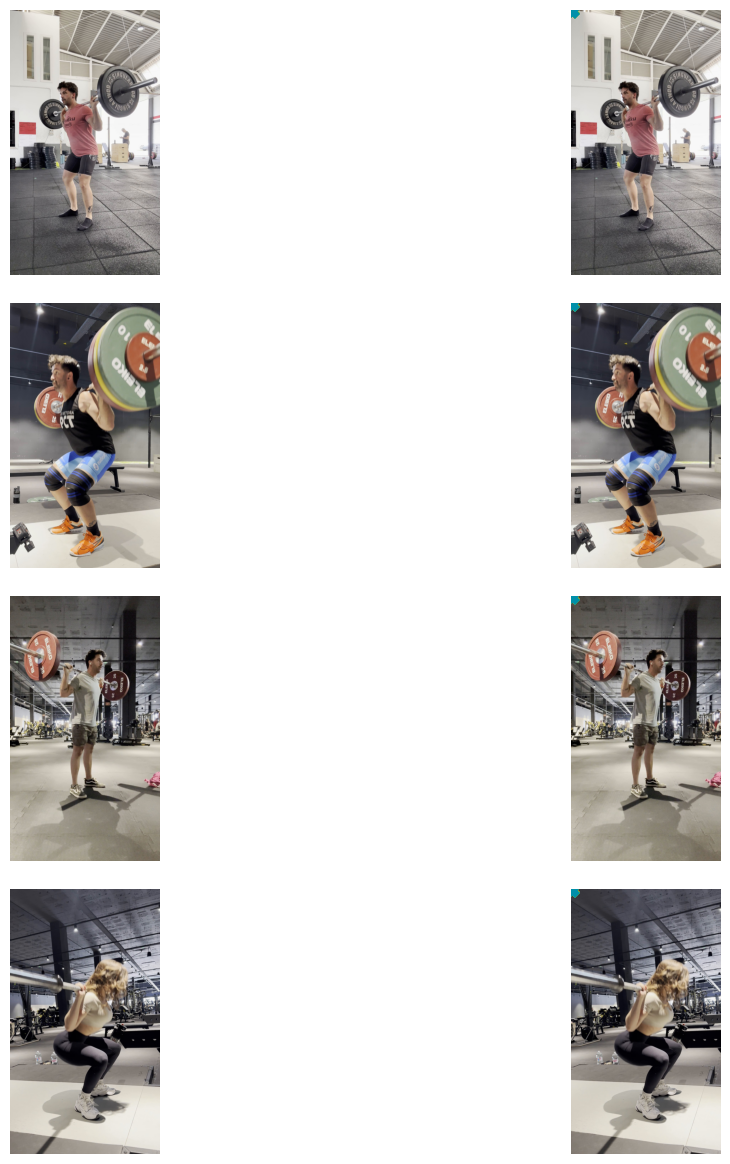

In [36]:
def visualize_keypoints(images, keypoints):
    fig, axes = plt.subplots(nrows=len(images), ncols=2, figsize=(16, 12))
    [ax.axis("off") for ax in np.ravel(axes)]

    for (ax_orig, ax_all), image, current_keypoint in zip(axes, images, keypoints):
        ax_orig.imshow(image)
        ax_all.imshow(image)

        # If the keypoints were formed by `imgaug` then the coordinates need
        # to be iterated differently.
        if isinstance(current_keypoint, KeypointsOnImage):
            for idx, kp in enumerate(current_keypoint.keypoints):
                ax_all.scatter(
                    [kp.x],
                    [kp.y],
                    c=colours[idx],
                    marker="x",
                    s=50,
                    linewidths=5,
                )
        else:
            current_keypoint = np.array(current_keypoint)
            # Since the last entry is the visibility flag, we discard it.
            current_keypoint = current_keypoint[:, :2]
            for idx, (x, y) in enumerate(current_keypoint):
                ax_all.scatter([x], [y], c=colours[idx], marker="x", s=50, linewidths=5)

    plt.tight_layout(pad=2.0)
    plt.show()


# Select four samples randomly for visualization.
samples = list(json_dict.keys())
num_samples = 4
selected_samples = np.random.choice(samples, num_samples, replace=False)

images, keypoints = [], []

for sample in selected_samples:
    data = get_annotation(sample)
    image = data["img_data"]
    keypoint = data["keypoints"]

    images.append(image)
    keypoints.append(keypoint)

visualize_keypoints(images, keypoints)

In [26]:

image_keys = list(annotations_dict.keys())

train_aug = iaa.Sequential(
    [
        iaa.Resize(IMG_SIZE, interpolation="linear"),
        iaa.Fliplr(0.3),
        # `Sometimes()` applies a function randomly to the inputs with
        # a given probability (0.3, in this case).
        iaa.Sometimes(0.3, iaa.Affine(rotate=10, scale=(0.5, 0.7))),
    ]
)

test_aug = iaa.Sequential([iaa.Resize(IMG_SIZE, interpolation="linear")])

df = KeyPointDataset(image_keys)

TypeError: KeyPointDataset.__init__() missing 1 required positional argument: 'aug'

In [ ]:
np.random.shuffle(samples)
train_keys, validation_keys = (
    samples[int(len(samples) * 0.15) :],
    samples[: int(len(samples) * 0.15)],
)

NameError: name 'df' is not defined